<a href="https://colab.research.google.com/github/heehee812/NST_with_creativity/blob/main/exploratory_creativity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
# Link your google drive to this notebook
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
from pathlib import Path

# Print current working directory
print('Now we are at ', end='')
!pwd

# Create the folders we need
if '/content/gdrive/My Drive/Colab_Images' not in os.getcwd():
  Path("gdrive/My Drive/Colab_Images/outputs").mkdir(parents=True, exist_ok=True)
  %cd ./gdrive/My\ Drive/Colab_Images

!ls

Now we are at /content
/content/gdrive/My Drive/Colab_Images
ancient_city.jpg	  japanese_flower_sakai_hoitsu.jpg
Aurea-Luna.jpg		  Kinkaku-ji.jpg
blue_swirls.jpg		  outputs
content_img_mask_inv.jpg  picasso.jpg
content_img_mask.jpg	  picasso_selfport1907.jpg
dancing.jpg		  red-canna.jpg
Dipping-Sun.jpg		  sagano_bamboo_forest.jpg
frida_kahlo.jpg		  style_img_mask.jpg
gdrive


# For making the exploratory creativity, we have 3 instances:
1. Repeat the element on content based on style
2. Change the angle or orientation based on style
3. Change the size base on the style

## 1. Repeat the content image on style

### Get the element on the content image

> let the content image become grayscale, combine with the origin image.


In [4]:
from PIL import Image

pre_content_img_name = 'dancing.jpg'
content_img_mask_name= 'content_img_mask.jpg'
img = Image.open(pre_content_img_name)
content_img_mask = img.convert('L')
content_img_mask = content_img_mask.point(lambda x: 0 if x<128 else 255, '1')
content_img_mask = content_img_mask.convert('RGB')
content_img_mask.save(content_img_mask_name)

In [5]:
import cv2
content_img = cv2.imread(pre_content_img_name)
content_img_mask = cv2.imread(content_img_mask_name)
img = cv2.bitwise_and(content_img, content_img_mask, dst=None, mask=None)
cv2.imwrite(content_img_mask_name, img)

True

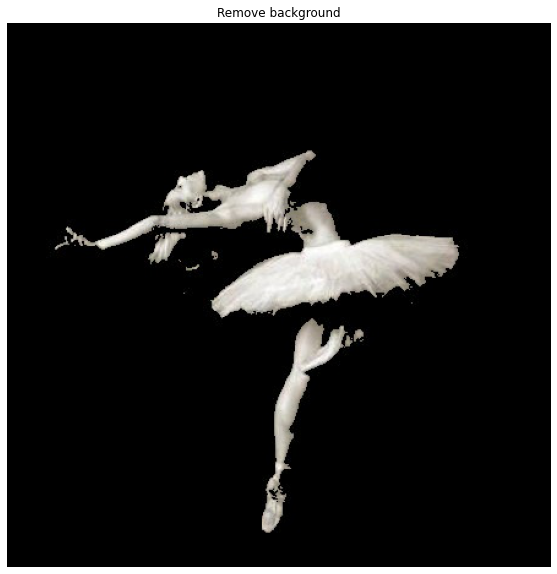

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
img = plt.imread(content_img_mask_name)
plt.axis('off')
plt.title('Remove background')
plt.imshow(img)

### Repeat the item that we get
> if we want the image to be repeated 2 times vertically and 3 times horizontally, we have the following tuple (2,3,1)


get the size of style image first

In [7]:
import numpy
import random
img = cv2.imread(content_img_mask_name)
content_img_tile = numpy.tile(img, (int(img.shape[0]/50), int(img.shape[1]/50), 1))
content_img_tile = cv2.resize(content_img_tile, (img.shape[1], img.shape[0]))
cv2.imwrite(content_img_mask_name, content_img_tile)

True

In [15]:
content_img_mask_inv_name = 'content_img_mask_inv.jpg'
img = Image.open(content_img_mask_name)
content_img_mask_inv = img.convert('L')
content_img_mask_inv = content_img_mask_inv.point(lambda x: 0 if x<128 else 255, '1')
content_img_mask_inv = content_img_mask_inv.convert('RGB')
content_img_mask_inv.save(content_img_mask_inv_name)

In [16]:
content_img_mask_inv = cv2.imread(content_img_mask_inv_name)
content_img = cv2.imread(pre_content_img_name)
content_img_mask_inv = cv2.bitwise_not(content_img_mask_inv)
imgcontent = cv2.bitwise_and(content_img_mask_inv, content_img, dst=None, mask=None)
imgcontent = cv2.bitwise_or(imgcontent, content_img_tile, dst=None, mask=None)

True

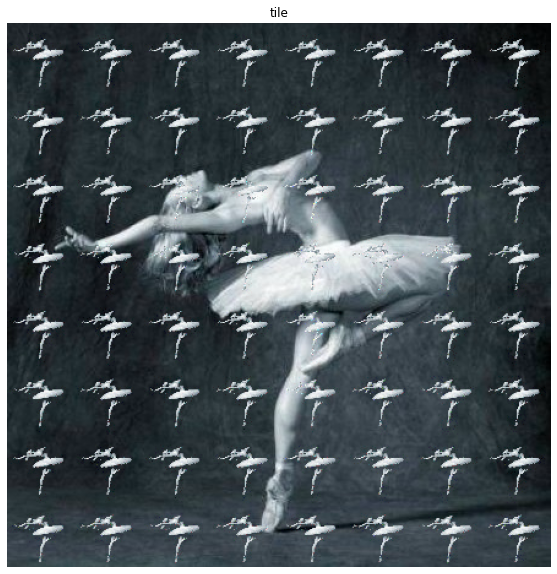

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('tile')
plt.imshow(imgcontent)
cv2.imwrite('result.jpg', imgcontent)

### Make a mask for style image

In [11]:
#resize the size of style image
pre_style_img_name = 'japanese_flower_sakai_hoitsu.jpg'
style_img_mask_name= 'style_img_mask.jpg'
style_img = cv2.imread(pre_style_img_name)
style_img = cv2.resize(style_img, (content_img.shape[1], content_img.shape[0]))
cv2.imwrite(pre_style_img_name, style_img)

True

In [19]:
img = Image.open(pre_style_img_name)
style_img_mask = img.convert('L')
style_img_mask = style_img_mask.point(lambda x: 0 if x<128 else 255, '1')
style_img_mask = style_img_mask.convert('RGB')
style_img_mask.save(style_img_mask_name)

In [20]:
style_img_mask = cv2.imread(style_img_mask_name)
style_img_mask_inv = cv2.bitwise_not(style_img_mask)
imgstyle = cv2.bitwise_and(style_img, style_img_mask_inv, dst=None, mask=None)
cv2.imwrite(style_img_mask_name, imgstyle)

True

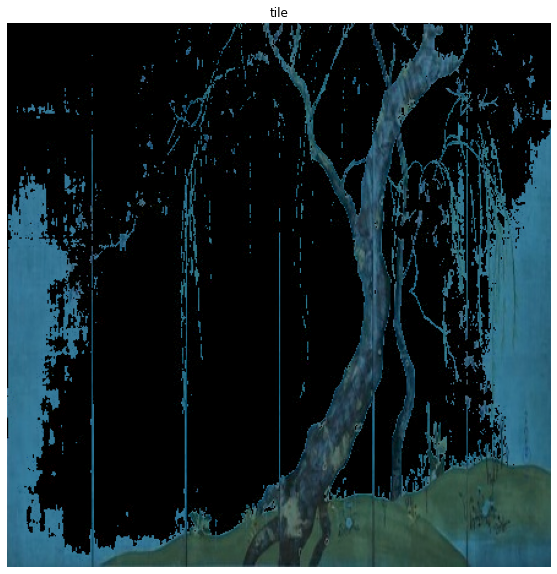

In [22]:
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('tile')
plt.imshow(imgstyle)

### combine style and repetitive items

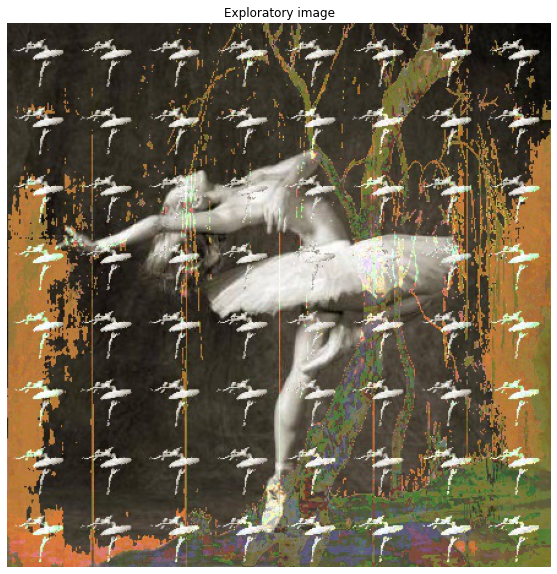

In [23]:
img = cv2.bitwise_or(imgcontent, imgstyle, dst=None, mask=None)
cv2.imwrite(style_img_mask_name, img)

fig = plt.figure(figsize=(10, 10))
img = plt.imread(style_img_mask_name)
plt.axis('off')
plt.title('Exploratory image')
plt.imshow(img)